In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


df=pd.read_excel("Problem Statement 2_ Data set.xlsx")
df.head()

,Id,Time,Machine,Component,Parameter,Value
0,48,2022-06-03 08:09:29,Excavator_1,Engine,Temparature,104.0
1,5,2022-05-12 02:05:42,Articulated_Truck_1,Fuel,Water in Fuel,70.0
2,24,2022-05-27 06:25:04,Articulated_Truck_1,Engine,Temparature,104.0
3,23,2022-05-12 20:36:47,Backhoe_Loader_1,Drive,Transmission Pressure,231.0
4,42,2022-06-28 04:06:30,Excavator_1,Engine,Oil Pressure,39.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1000 non-null   int64  
 1   Time       1000 non-null   object 
 2   Machine    1000 non-null   object 
 3   Component  1000 non-null   object 
 4   Parameter  1000 non-null   object 
 5   Value      1000 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 47.0+ KB


In [13]:
df.isna().sum()

Id           0
Time         0
Machine      0
Component    0
Parameter    0
Value        0
dtype: int64

In [14]:
df.drop(columns=["Id","Time",],inplace=True)
df.head()

,Machine,Component,Parameter,Value
0,Excavator_1,Engine,Temparature,104.0
1,Articulated_Truck_1,Fuel,Water in Fuel,70.0
2,Articulated_Truck_1,Engine,Temparature,104.0
3,Backhoe_Loader_1,Drive,Transmission Pressure,231.0
4,Excavator_1,Engine,Oil Pressure,39.0


In [15]:
df["Machine"].value_counts()

Machine
Excavator_1            200
Articulated_Truck_1    200
Backhoe_Loader_1       200
Dozer_1                200
Asphalt_Paver_1        200
Name: count, dtype: int64

In [16]:
df["Component"].value_counts()

Component
Engine    250
Fuel      250
Drive     250
Misc      250
Name: count, dtype: int64

In [17]:
macGrpDf=df.sort_values(by=["Machine"]).reset_index().drop("index",axis=1)
macGrpDf.head()

,Machine,Component,Parameter,Value
0,Articulated_Truck_1,Misc,System Voltage,12.6
1,Articulated_Truck_1,Fuel,Temparature,0.0
2,Articulated_Truck_1,Engine,Temparature,80.0
3,Articulated_Truck_1,Drive,Brake Control,4.0
4,Articulated_Truck_1,Fuel,Pressure,62.0


In [18]:
def thresholdify(row):
    comp = row['Component']
    para = row['Parameter']
    val = row['Value']
    t_min = 0.0
    t_max = 2000
    prob = "Low"

    if comp == "Engine":
        if para == "Oil Pressure":
            t_min = 25
            t_max = 65
            if (val <= 25) or (val >= 65):
                prob = "High"
        elif para == "Speed":
            t_max = 1800
            if val >= 1800:
                prob = "Medium"
        else:
            t_max = 105
            if val >= 105:
                prob = "High"
    elif comp == "Drive":
        if para == "Brake Control":
            t_min = 1
            if val <= 1:
                prob = "Medium"
        elif para == "Transmission Pressure":
            t_min = 200
            t_max = 450
            if (val <= 200) or (val >= 450):
                prob = "Medium"
        else:
            t_max = 4.7
    elif comp == "Fuel":
        if para == "Water in Fuel":
            t_max = 1800
            if val >= 1800:
                prob = "High"
        elif para == "Level":
            t_min = 1
        elif para == "Pressure":
            t_min = 35
            t_max = 65
        else:
            t_max = 400
            if val >= 400:
                prob = "High"
    else:
        if para == "System Voltage":
            t_min = 12
            t_max = 15
            if (val <= 12) or (val >= 15):
                prob = "High"
        elif para == "Exhaust Gas Temperature":
            t_max = 365
            if val >= 365:
                prob = "High"
        elif para == "Hydraulic Pump Rate":
            t_max = 125
            if val >= 125:
                prob = "Medium"
        else:
            t_min = 20
            if val <= 20:
                prob = "Medium"

    return pd.Series({"Min_Threshold": t_min, "Max_Threshold": t_max, "Failure Probability": prob})

threshold_df = macGrpDf.apply(thresholdify, axis=1)

threshold_df


,Min_Threshold,Max_Threshold,Failure Probability
0,12.0,15.0,Low
1,0.0,400.0,Low
2,0.0,105.0,Low
3,1.0,2000.0,Low
4,35.0,65.0,Low
...,...,...,...
995,0.0,105.0,Low
996,0.0,4.7,Low
997,200.0,450.0,Low
998,0.0,4.7,Low


In [21]:
pd.concat([macGrpDf, threshold_df], axis=1).to_csv(r"C:\Users\kumar\Documents\Caterpillar\ModifiedPMDataset.csv",index=False)

In [22]:
df=pd.read_csv("ModifiedPMDataset.csv")
df

,Machine,Component,Parameter,Value,Min_Threshold,Max_Threshold,Failure Probability
0,Articulated_Truck_1,Misc,System Voltage,12.600000,12.0,15.0,Low
1,Articulated_Truck_1,Fuel,Temparature,0.000000,0.0,400.0,Low
2,Articulated_Truck_1,Engine,Temparature,80.000000,0.0,105.0,Low
3,Articulated_Truck_1,Drive,Brake Control,4.000000,1.0,2000.0,Low
4,Articulated_Truck_1,Fuel,Pressure,62.000000,35.0,65.0,Low
...,...,...,...,...,...,...,...
995,Excavator_1,Engine,Temparature,75.000000,0.0,105.0,Low
996,Excavator_1,Drive,Pedal Sensor,4.682924,0.0,4.7,Low
997,Excavator_1,Drive,Transmission Pressure,323.000000,200.0,450.0,Low
998,Excavator_1,Drive,Pedal Sensor,4.827449,0.0,4.7,Low


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Machine              1000 non-null   object 
 1   Component            1000 non-null   object 
 2   Parameter            1000 non-null   object 
 3   Value                1000 non-null   float64
 4   Min_Threshold        1000 non-null   float64
 5   Max_Threshold        1000 non-null   float64
 6   Failure Probability  1000 non-null   object 
dtypes: float64(3), object(4)
memory usage: 54.8+ KB


In [24]:
df.describe(include="all")

,Machine,Component,Parameter,Value,Min_Threshold,Max_Threshold,Failure Probability
count,1000,1000,1000,1000.000000,1000.000000,1000.00000,1000
unique,5,4,13,NaN,NaN,NaN,3
top,Articulated_Truck_1,Misc,Temparature,NaN,NaN,NaN,Low
freq,200,250,125,NaN,NaN,NaN,968
mean,NaN,NaN,NaN,273.115148,24.610000,933.87600,NaN
std,NaN,NaN,NaN,472.142807,54.593666,891.86423,NaN
min,NaN,NaN,NaN,0.000000,0.000000,4.70000,NaN
25%,NaN,NaN,NaN,12.422067,0.000000,65.00000,NaN
50%,NaN,NaN,NaN,61.000000,1.000000,450.00000,NaN
75%,NaN,NaN,NaN,286.250000,20.000000,2000.00000,NaN


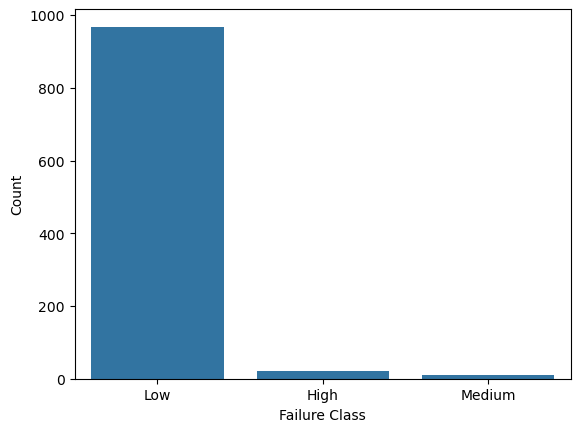

In [25]:
probabilityCount=df["Failure Probability"].value_counts()
plt.figure()
sns.barplot(probabilityCount)
plt.xlabel("Failure Class")
plt.ylabel("Count")
plt.show()

In [26]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
x=df[["Component","Parameter","Value"]]
x.iloc[:, 0] = le.fit_transform(x.iloc[:, 0])
x.iloc[:, 1] = le.fit_transform(x.iloc[:, 1])

oe = OrdinalEncoder(categories=[["Low", "Medium", "High"]])
y = oe.fit_transform(df[["Failure Probability"]]).flatten()

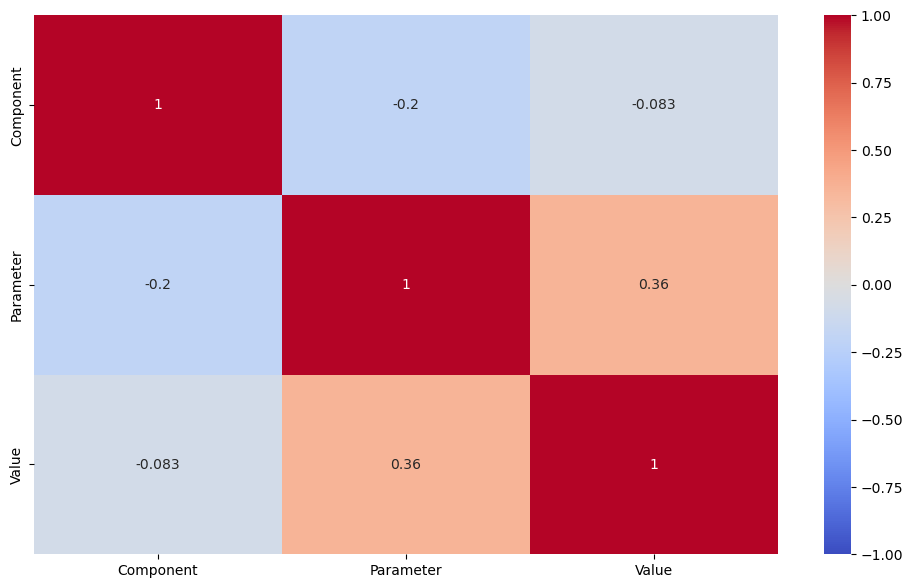

In [27]:
corr_matrix=x.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr_matrix,cmap="coolwarm",annot=True,vmin=-1)
plt.show()

In [28]:
from sklearn.model_selection import train_test_split as tte

x_train,x_test,y_train,y_test=tte(x,y,test_size=0.2,random_state=42)

c:\Users\kumar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


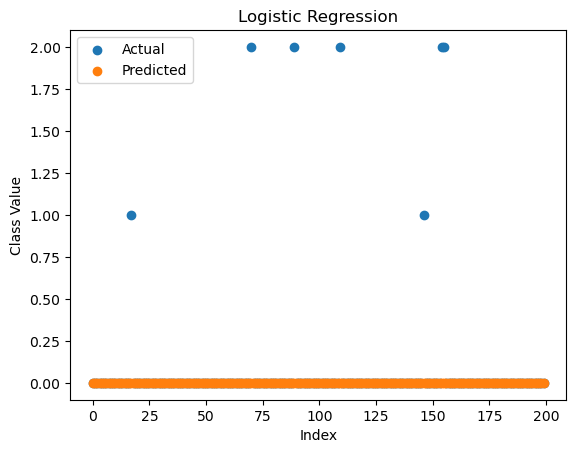

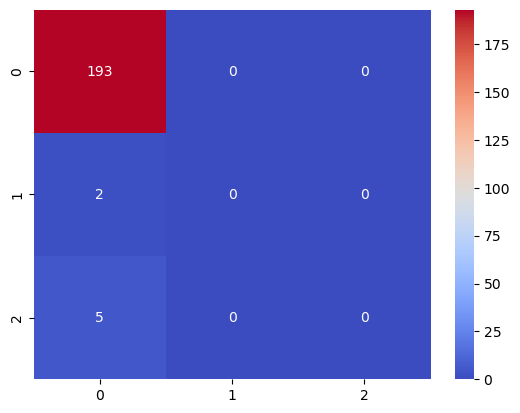

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       193
         1.0       0.00      0.00      0.00         2
         2.0       0.00      0.00      0.00         5

    accuracy                           0.96       200
   macro avg       0.32      0.33      0.33       200
weighted avg       0.93      0.96      0.95       200

0.965 0.931225 0.965 0.9478117048346055


c:\Users\kumar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kumar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kumar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kumar\anaconda3\Lib\site-packag

In [29]:
from sklearn.linear_model import LogisticRegression 

lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

comparisonDf=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
comparisonDf

plt.scatter(comparisonDf.index,comparisonDf["Actual"],label="Actual")
plt.scatter(comparisonDf.index,comparisonDf["Predicted"],label="Predicted")
plt.legend()
plt.title("Logistic Regression")
plt.xlabel("Index")
plt.ylabel("Class Value")
plt.show()

conf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,cmap="coolwarm",annot=True,fmt="d")
plt.show()

print(classification_report(y_test,y_pred))

lr_acc=accuracy_score(y_test,y_pred)
lr_prec=precision_score(y_test,y_pred,average="weighted")
lr_rec=recall_score(y_test,y_pred,average="weighted")
lr_f1=f1_score(y_test,y_pred,average="weighted")

print(lr_acc,lr_prec,lr_rec,lr_f1)

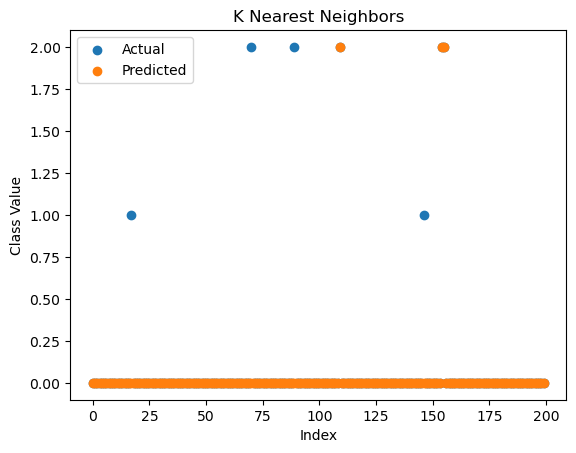

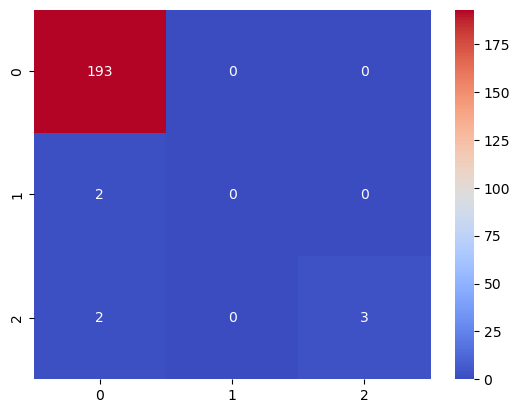

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       193
         1.0       0.00      0.00      0.00         2
         2.0       1.00      0.60      0.75         5

    accuracy                           0.98       200
   macro avg       0.66      0.53      0.58       200
weighted avg       0.97      0.98      0.97       200

0.98 0.9704060913705583 0.98 0.9738525641025642


c:\Users\kumar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kumar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kumar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kumar\anaconda3\Lib\site-packag

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

comparisonDf=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
comparisonDf

plt.scatter(comparisonDf.index,comparisonDf["Actual"],label="Actual")
plt.scatter(comparisonDf.index,comparisonDf["Predicted"],label="Predicted")
plt.legend()
plt.title("K Nearest Neighbors")
plt.xlabel("Index")
plt.ylabel("Class Value")
plt.show()

conf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,cmap="coolwarm",annot=True,fmt="d")
plt.show()

print(classification_report(y_test,y_pred))

knn_acc=accuracy_score(y_test,y_pred)
knn_prec=precision_score(y_test,y_pred,average="weighted")
knn_rec=recall_score(y_test,y_pred,average="weighted")
knn_f1=f1_score(y_test,y_pred,average="weighted")

print(knn_acc,knn_prec,knn_rec,knn_f1)

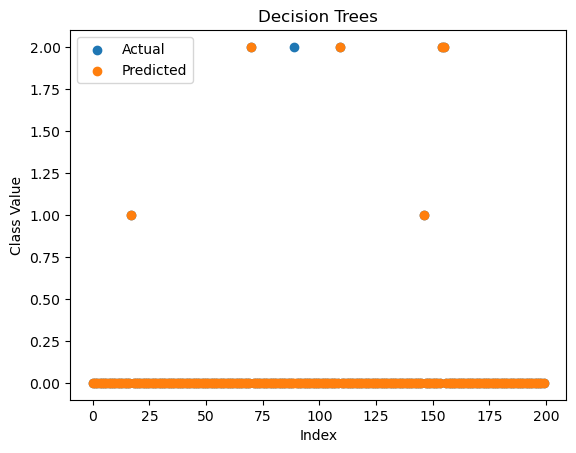

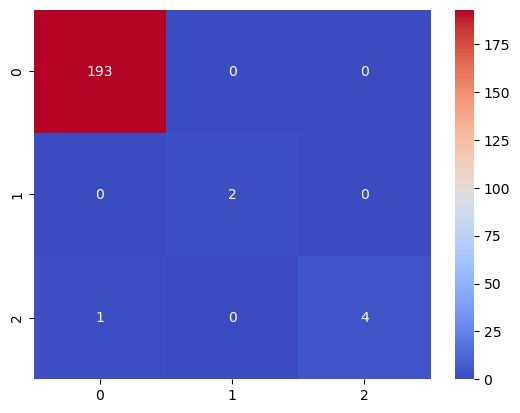

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       193
         1.0       1.00      1.00      1.00         2
         2.0       1.00      0.80      0.89         5

    accuracy                           0.99       200
   macro avg       1.00      0.93      0.96       200
weighted avg       1.00      0.99      0.99       200

0.995 0.9950257731958763 0.995 0.9947286821705427


In [31]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

comparisonDf=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
comparisonDf

plt.scatter(comparisonDf.index,comparisonDf["Actual"],label="Actual")
plt.scatter(comparisonDf.index,comparisonDf["Predicted"],label="Predicted")
plt.legend()
plt.title("Decision Trees")
plt.xlabel("Index")
plt.ylabel("Class Value")
plt.show()

conf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,cmap="coolwarm",annot=True,fmt="d")
plt.show()

print(classification_report(y_test,y_pred))

dt_acc=accuracy_score(y_test,y_pred)
dt_prec=precision_score(y_test,y_pred,average="weighted")
dt_rec=recall_score(y_test,y_pred,average="weighted")
dt_f1=f1_score(y_test,y_pred,average="weighted")

print(dt_acc,dt_prec,dt_rec,dt_f1)

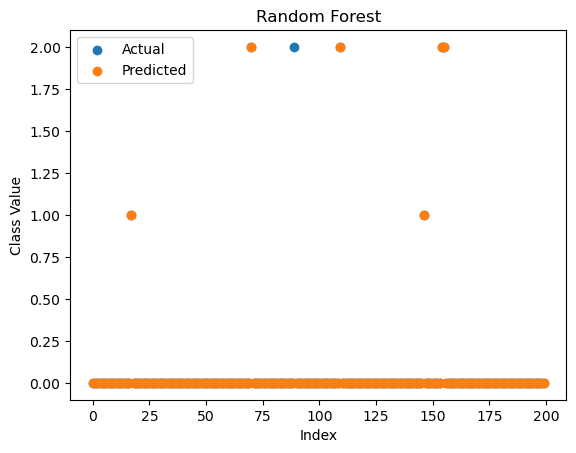

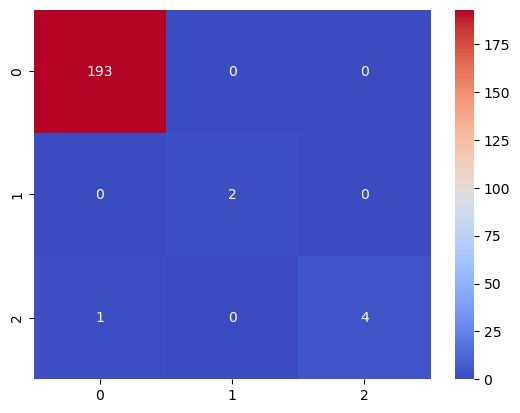

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       193
         1.0       1.00      1.00      1.00         2
         2.0       1.00      0.80      0.89         5

    accuracy                           0.99       200
   macro avg       1.00      0.93      0.96       200
weighted avg       1.00      0.99      0.99       200

0.995 0.9950257731958763 0.995 0.9947286821705427


In [32]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

comparisonDf=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
comparisonDf

plt.scatter(comparisonDf.index,comparisonDf["Actual"],label="Actual")
plt.scatter(comparisonDf.index,comparisonDf["Predicted"],label="Predicted")
plt.legend()
plt.title("Random Forest")
plt.xlabel("Index")
plt.ylabel("Class Value")
plt.show()

conf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,cmap="coolwarm",annot=True,fmt="d")
plt.show()

print(classification_report(y_test,y_pred))

rfc_acc=accuracy_score(y_test,y_pred)
rfc_prec=precision_score(y_test,y_pred,average="weighted")
rfc_rec=recall_score(y_test,y_pred,average="weighted")
rfc_f1=f1_score(y_test,y_pred,average="weighted")

print(rfc_acc,rfc_prec,rfc_rec,rfc_f1)

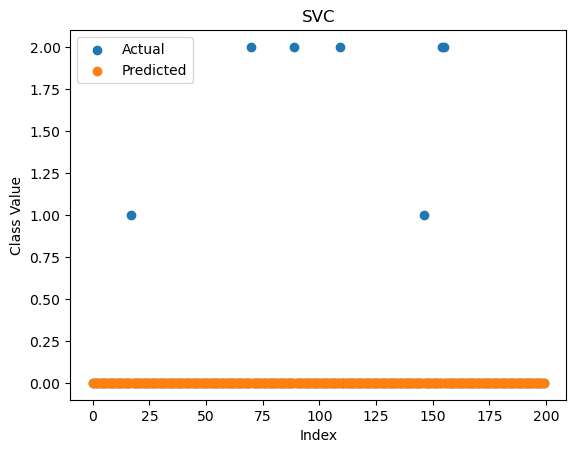

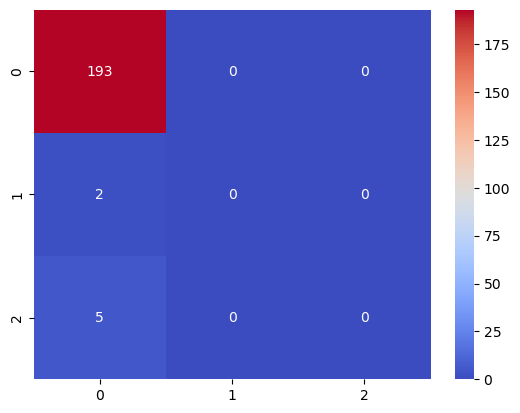

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       193
         1.0       0.00      0.00      0.00         2
         2.0       0.00      0.00      0.00         5

    accuracy                           0.96       200
   macro avg       0.32      0.33      0.33       200
weighted avg       0.93      0.96      0.95       200

0.965 0.931225 0.965 0.9478117048346055


c:\Users\kumar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kumar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kumar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kumar\anaconda3\Lib\site-packag

In [33]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)

comparisonDf=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
comparisonDf

plt.scatter(comparisonDf.index,comparisonDf["Actual"],label="Actual")
plt.scatter(comparisonDf.index,comparisonDf["Predicted"],label="Predicted")
plt.legend()
plt.title("SVC")
plt.xlabel("Index")
plt.ylabel("Class Value")
plt.show()

conf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,cmap="coolwarm",annot=True,fmt="d")
plt.show()

print(classification_report(y_test,y_pred))

svc_acc=accuracy_score(y_test,y_pred)
svc_prec=precision_score(y_test,y_pred,average="weighted")
svc_rec=recall_score(y_test,y_pred,average="weighted")
svc_f1=f1_score(y_test,y_pred,average="weighted")

print(svc_acc,svc_prec,svc_rec,svc_f1)

c:\Users\kumar\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


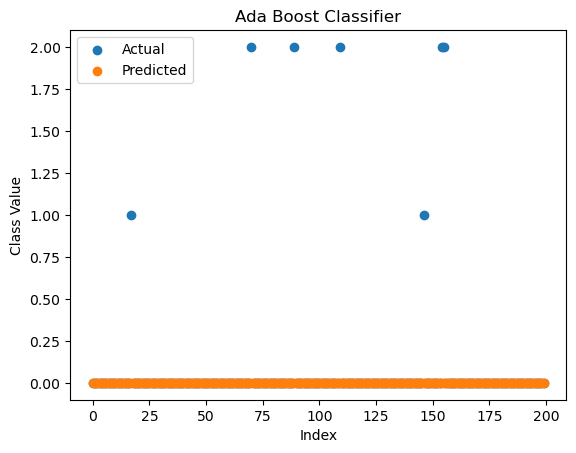

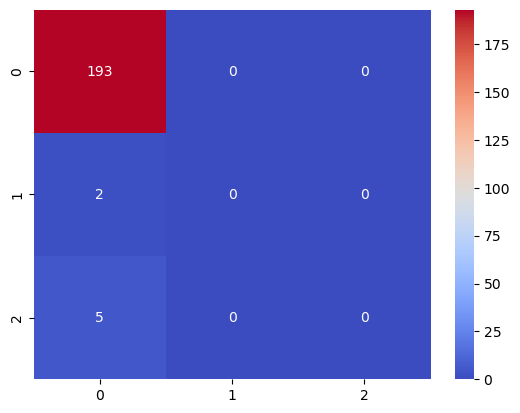

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       193
         1.0       0.00      0.00      0.00         2
         2.0       0.00      0.00      0.00         5

    accuracy                           0.96       200
   macro avg       0.32      0.33      0.33       200
weighted avg       0.93      0.96      0.95       200

0.965 0.931225 0.965 0.9478117048346055


c:\Users\kumar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kumar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kumar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kumar\anaconda3\Lib\site-packag

In [34]:
from sklearn.ensemble import AdaBoostClassifier

abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
y_pred=abc.predict(x_test)

comparisonDf=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
comparisonDf

plt.scatter(comparisonDf.index,comparisonDf["Actual"],label="Actual")
plt.scatter(comparisonDf.index,comparisonDf["Predicted"],label="Predicted")
plt.legend()
plt.title("Ada Boost Classifier")
plt.xlabel("Index")
plt.ylabel("Class Value")
plt.show()

conf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,cmap="coolwarm",annot=True,fmt="d")
plt.show()

print(classification_report(y_test,y_pred))

abc_acc=accuracy_score(y_test,y_pred)
abc_prec=precision_score(y_test,y_pred,average="weighted")
abc_rec=recall_score(y_test,y_pred,average="weighted")
abc_f1=f1_score(y_test,y_pred,average="weighted")

print(abc_acc,abc_prec,abc_rec,abc_f1)

In [35]:
acc_series=pd.Series([lr_acc,knn_acc,dt_acc,rfc_acc,abc_acc]) * 100
prec_series=pd.Series([lr_prec,knn_prec,dt_prec,rfc_prec,abc_prec]) * 100
rec_series=pd.Series([lr_rec,knn_rec,dt_rec,rfc_rec,abc_rec]) * 100
f1_series=pd.Series([lr_f1,knn_f1,dt_f1,rfc_f1,abc_f1]) * 100
classification_algos=pd.Series(["Logistic Regression","K Nearest Neighbors","Decision Trees","Random Forest","Ada Boost"])

performance_df=pd.DataFrame({"Classification Algorithm":classification_algos,"Accuracy":acc_series,"Precision":prec_series,"Recall":rec_series,"F1 Score": f1_series}).set_index("Classification Algorithm")
performance_df

,Accuracy,Precision,Recall,F1 Score
Classification Algorithm,,,,
Logistic Regression,96.5,93.122500,96.5,94.781170
K Nearest Neighbors,98.0,97.040609,98.0,97.385256
Decision Trees,99.5,99.502577,99.5,99.472868
Random Forest,99.5,99.502577,99.5,99.472868
Ada Boost,96.5,93.122500,96.5,94.781170


C:\Users\kumar\AppData\Local\Temp\ipykernel_18144\2278205836.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(sorted_df.index[j], sorted_df[col][j] + 0.5, round(sorted_df[col][j], 2), ha='center', fontsize=13, color="black")
C:\Users\kumar\AppData\Local\Temp\ipykernel_18144\2278205836.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(sorted_df.index[j], sorted_df[col][j] + 0.5, round(sorted_df[col][j], 2), ha='center', fontsize=13, color="black")
C:\Users\kumar\AppData\Local\Temp\ipykernel_18144\2278205836.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a

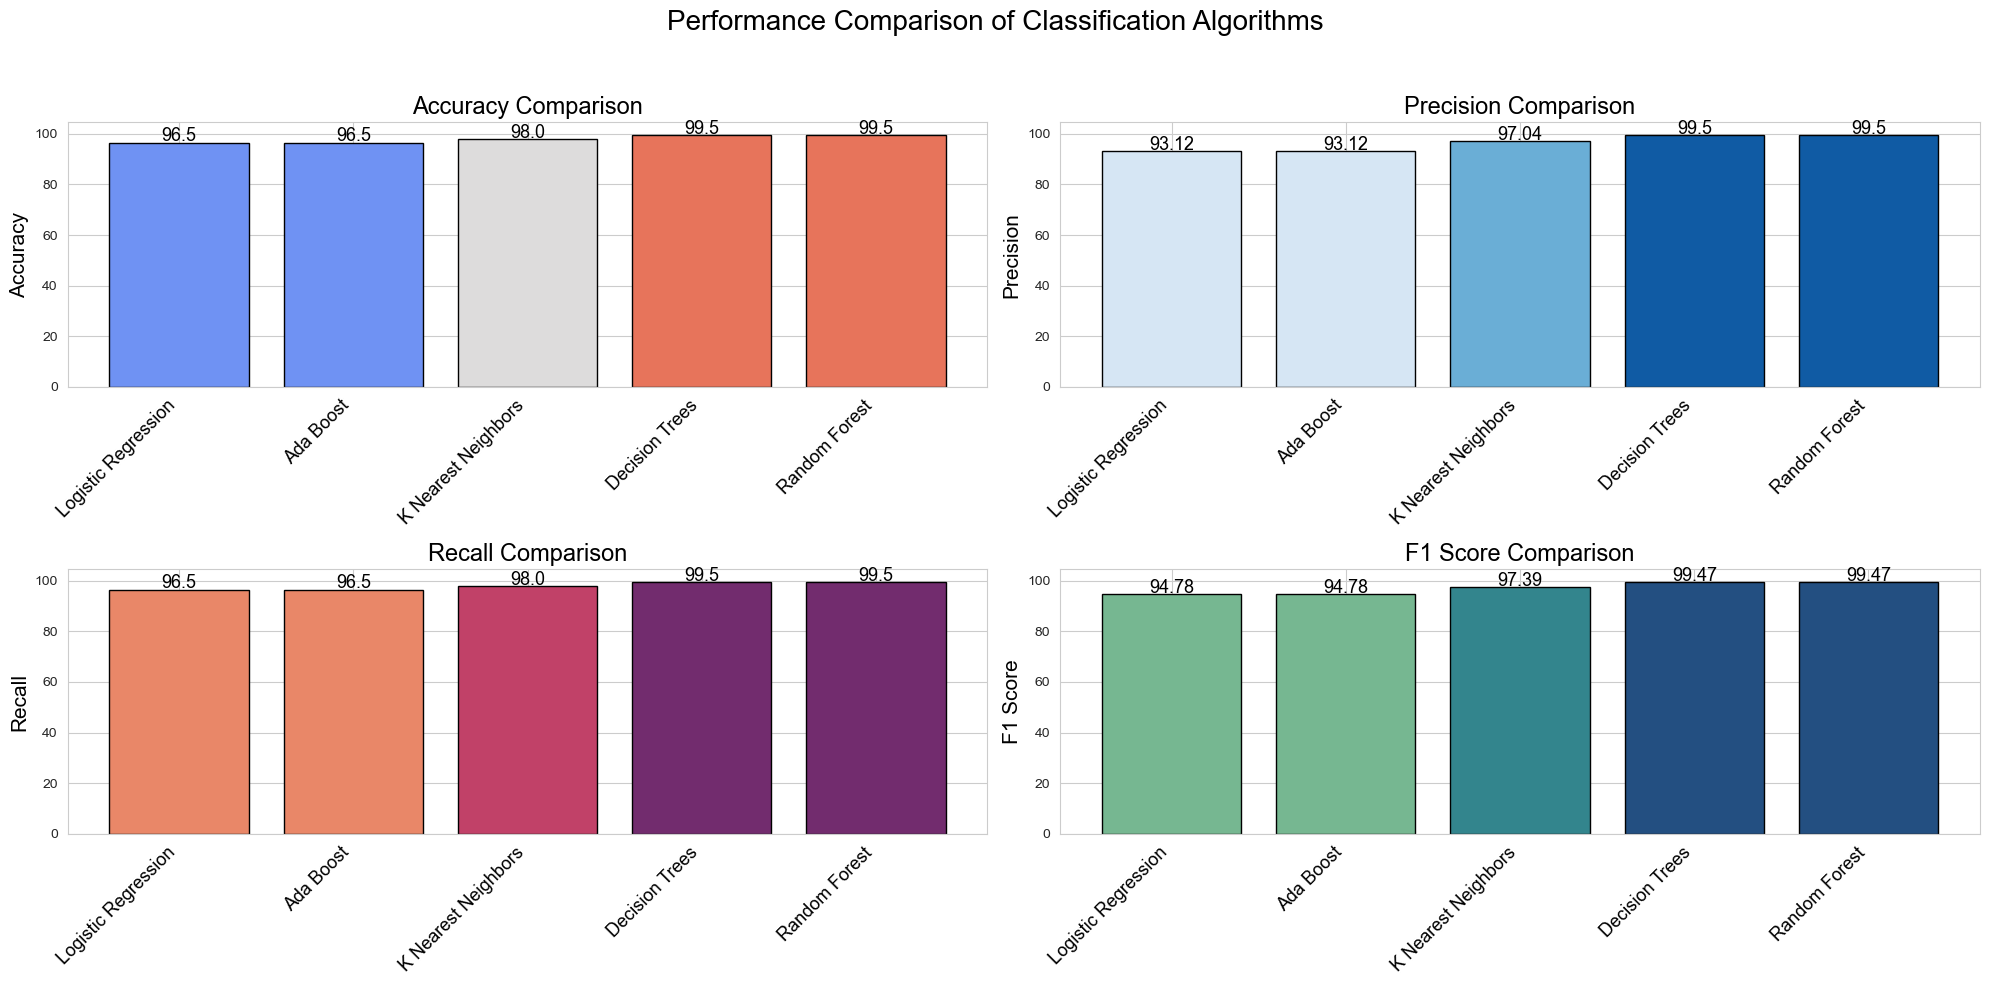

In [36]:
sns.set_style("whitegrid")

colors = ["coolwarm", "Blues", "flare", "crest"] 

plt.figure(figsize=(20, 10))
i = 1
for col in performance_df.columns:
    sorted_df = performance_df.sort_values(by=col)
    
    def colors_from_values(values, palette_name):
        normalized = (values - min(values)) / (max(values) - min(values))
        indices = np.round(normalized * (len(palette_name) - 1)).astype(np.int32)
        palette = sns.color_palette(palette_name, len(palette_name))
        return np.array(palette).take(indices, axis=0)
    
    bar_colors = colors_from_values(sorted_df[col], sns.color_palette(colors[i-1], n_colors=len(sorted_df[col])))
    
    plt.subplot(2, 2, i)
    bars = plt.bar(sorted_df.index, sorted_df[col], color=bar_colors, edgecolor='black')
    
    for j in range(len(sorted_df[col])):
        plt.text(sorted_df.index[j], sorted_df[col][j] + 0.5, round(sorted_df[col][j], 2), ha='center', fontsize=13, color="black")
    
    plt.title(f"{col} Comparison", fontsize=17, color="black")
    plt.xlabel('')
    plt.ylabel(col, fontsize=15, color="black")
    plt.xticks(rotation=45, ha='right', fontsize=13, color="black")
    
    i += 1

plt.suptitle('Performance Comparison of Classification Algorithms', fontsize=20, color="black")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### From the above chart we can observe that the Random Forest model has the most accuracy among all other models. Saving the model below in pickle format.

In [37]:
import pickle

pickle.dump(rfc,open('model.pkl','wb'))